In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as mms

The data was downloaded from https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs.
The data itself contains around 1300 text file, each contain the Date, Opening price, High, Low, Closing price, Volumne, and Ticker.
I sorted the data based on the Date, and from this you will notice that the ETF's started on different dates. The total size of all of the file is round 5GB.

In [2]:
df=pd.read_csv("Complete.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.750,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.260,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.749,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.103,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.643,45.749,46.447,10971066,qqq


The histogram below shows how many entries occurs in a given year.

,Date,Open,High,Low,Close,Volume,Ticker
0,1999-03-10,45.722,45.7500,44.967,45.665,11700414,qqq
1,1999-03-11,45.994,46.2600,44.988,45.880,21670048,qqq
2,1999-03-12,45.721,45.7490,44.406,44.770,19553768,qqq
3,1999-03-15,45.101,46.1030,44.625,46.052,14245348,qqq
4,1999-03-16,46.253,46.6430,45.749,46.447,10971066,qqq
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


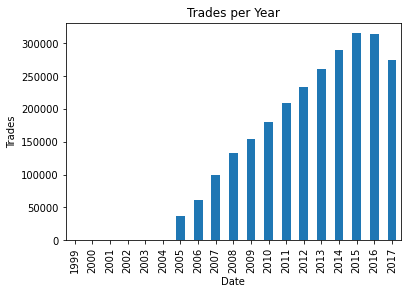

In [3]:
df.Date=pd.to_datetime(df.Date)
plt.title("Trades per Year")
plt.ylabel("Trades")
df["Ticker"].groupby(df["Date"].dt.year).count().plot(kind="bar")
df

From this histogram we can see that nothing really happened until 2005.
As I explore the data farther, I notice that the varities of ETF increases around 2006. (see the two dataframes below)

In [4]:
df.describe()

,Open,High,Low,Close,Volume
count,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06,2.565578e+06
mean,2.246837e+03,2.360110e+03,2.152194e+03,2.239545e+03,1.555495e+06
std,1.710631e+05,1.803383e+05,1.637205e+05,1.707775e+05,1.192350e+07
min,0.000000e+00,2.598000e-01,0.000000e+00,2.472000e-01,0.000000e+00
25%,2.263600e+01,2.276722e+01,2.248300e+01,2.262700e+01,9.226000e+03
50%,3.518900e+01,3.542900e+01,3.491100e+01,3.517600e+01,4.651500e+04
75%,5.632300e+01,5.664200e+01,5.595500e+01,5.631400e+01,2.487000e+05
max,3.411600e+07,3.715200e+07,3.369600e+07,3.530400e+07,1.519430e+09


In [5]:
df.info

<bound method DataFrame.info of               Date     Open      High      Low    Close    Volume Ticker
0       1999-03-10   45.722   45.7500   44.967   45.665  11700414    qqq
1       1999-03-11   45.994   46.2600   44.988   45.880  21670048    qqq
2       1999-03-12   45.721   45.7490   44.406   44.770  19553768    qqq
3       1999-03-15   45.101   46.1030   44.625   46.052  14245348    qqq
4       1999-03-16   46.253   46.6430   45.749   46.447  10971066    qqq
...            ...      ...       ...      ...      ...       ...    ...
2565573 2017-11-10   35.620   35.6300   35.500   35.625     15985   ipkw
2565574 2017-11-10   37.590   37.7200   37.585   37.700     10324   ftls
2565575 2017-11-10  127.450  127.8200  127.295  127.450    256090    vbr
2565576 2017-11-10   36.320   36.4900   36.320   36.420      6207   cnxt
2565577 2017-11-10   44.070   44.0886   43.950   44.040   5202797    vea

[2565578 rows x 7 columns]>

In [6]:
df.loc[df.Date.dt.year>=2005]

,Date,Open,High,Low,Close,Volume,Ticker
1462,2005-01-03,36.209,36.3930,35.561,35.678,111787644,qqq
1463,2005-01-04,35.829,35.8940,34.821,35.028,151258105,qqq
1464,2005-01-05,34.939,35.1900,34.748,34.811,141628343,qqq
1465,2005-01-06,34.884,34.9570,34.622,34.632,113984820,qqq
1466,2005-01-07,34.831,35.1090,34.515,34.821,136288865,qqq
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


In [7]:
df.loc[df.Date.dt.year>=2006]

,Date,Open,High,Low,Close,Volume,Ticker
38805,2006-01-03,25.080,25.8620,25.080,25.862,2682113,iye
38806,2006-01-03,19.472,19.6050,19.366,19.580,1643352,xlp
38807,2006-01-03,45.048,45.8900,44.690,45.682,75312,igm
38808,2006-01-03,92.193,93.1530,91.591,92.957,11352012,dia
38809,2006-01-03,46.760,46.7690,46.760,46.769,12012,kie
...,...,...,...,...,...,...,...
2565573,2017-11-10,35.620,35.6300,35.500,35.625,15985,ipkw
2565574,2017-11-10,37.590,37.7200,37.585,37.700,10324,ftls
2565575,2017-11-10,127.450,127.8200,127.295,127.450,256090,vbr
2565576,2017-11-10,36.320,36.4900,36.320,36.420,6207,cnxt


In [8]:
# declaring the time range of the data
begin=2007
end=2017
firstYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==begin]
lastYearDf=df[["Ticker","Date"]].loc[df.Date.dt.year==end]

In [9]:
# filtering down to tickers that existed before 'begin' and are still there when it is 'end'
fYStock=firstYearDf.Ticker.unique().tolist()
lYStock=lastYearDf.Ticker.unique().tolist()
tickers=[i for i in fYStock if i in lYStock]

In [ ]:
dateHist=[]
tickHist=[]

tlDate=df[["Ticker","Date"]].loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
tlDate

dates=np.array(tlDate.Date.unique(),dtype="datetime64[D]")
for d in dates:
    dateHist.append([len(tlDate.loc[tlDate.Date == d]),d])

for t in tickers:
    tickHist.append([len(tlDate.loc[tlDate.Ticker==t]),t])

I made a count of the number of time a ETF occurs within the given time range, and found the only consisted ETFs are spyg, soxx, slyv, and qqq as they have the highest amount of occurence. I know there are some missing data in there so I decided to keep the ETFs that occurs the most to minimized missing data and fill in the missing data with the data of the previous day.

In [ ]:
tickHist.sort(reverse=True)
print(tickHist)

In [ ]:
# using the ETFs in tickers list
tickers=['spyg','soxx','slyv','qqq']
finalDf=df.loc[(df.Date.dt.year>=begin) & (df.Date.dt.year<=end) & (df.Ticker.isin(tickers))]
finalDf

Below I looked at the did some EDA on each ETFs, from this, I notice that the all of the features has low standard deviation, except for the Volume. But I don't believe that we should focus on the mean and std of open, and close as the data is nonstationary as things such as inflation will cause the mean of the data to shift up. Instead I think that we should focus more on volume as there is less noise that impact that feature. Looking at the volume I can see that the std is much more noticable as its std is larger than its mean.

In [ ]:
finalDf.loc[finalDf.Ticker=="spyg"].describe()

In [ ]:
finalDf.loc[finalDf.Ticker=="slyv"].describe()

In [ ]:
finalDf.loc[finalDf.Ticker=="soxx"].describe()

In [ ]:
finalDf.loc[finalDf.Ticker=="qqq"].describe()

Since the trade centers are open on the weekdays, I decided to set the data range to be the years 2007 to 2017 weekdays only.

In [ ]:
### setting up the time range, no weekends
idx=pd.date_range("2007-01-03","2017-11-10",freq='B')

### filling in the missing data
spyDf=finalDf.loc[finalDf.Ticker=="spyg"].set_index("Date")
slyDf=finalDf.loc[finalDf.Ticker=="slyv"].set_index("Date")
soxDf=finalDf.loc[finalDf.Ticker=="soxx"].set_index("Date")
qqqDf=finalDf.loc[finalDf.Ticker=="qqq"].set_index("Date")

spyDf=spyDf.reindex(idx,method='bfill')
slyDf=slyDf.reindex(idx,method='bfill')
soxDf=soxDf.reindex(idx,method='bfill')
qqqDf=qqqDf.reindex(idx,method='bfill')

In [ ]:
plt.plot(spyDf.Open,label="spyg")
plt.plot(slyDf.Open,label="slyv")
plt.plot(soxDf.Open,label="soxx")
plt.plot(qqqDf.Open,label="qqq")
plt.xlabel('Year')
plt.ylabel('Price Dollar')
plt.legend()
plt.show()

I standardize the data so that it is easier for the machine to process.

In [ ]:
l=[spyDf,slyDf,soxDf,qqqDf]
hDf=pd.concat(l)
features=['Open','High','Low','Close','Volume']
scaler=mms()
cDf=pd.DataFrame({"Open"})
for i in l:
    stockinfo=i[features]
    stockinfo[features]=scaler.fit_transform(stockinfo[features])
    cDf=pd.concat([cDf,stockinfo],axis=1)
cDf

In [ ]:
cDf=cDf.drop(columns=0)
cDf=cDf[1:]
cDf

In [ ]:
cDf.to_csv('CleanData.csv',index=False)
hDf.to_csv('CleanDataHuman.csv',index=False)